# Tarea 7. Estimación del riesgo sistemático ($\beta$).

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea aplicarás la técnica aprendida en clase para la estimación del coeficiente de riesgo sistemático $\beta$, el cual es primordial en el modelo de valoración de activos en equilibrio CAPM.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea7_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea7_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Selección de activos (10 puntos)

Seleccionar cinco (5) activos de su preferencia y enunciarlos en una celda en formato Markdown.

### Usaré Apple, Microsoft, Google, Facebook y Netflix

## 2. Descarga de datos (10 puntos)

Descargar los precios mensuales ajustados en el cierre para el índice S&P 500 (^GSPC).

1. Graficar los precios (5 puntos).
2. Graficar los rendimientos (5 puntos).

In [1]:
# Importar paquetes
import pandas as pd
import pandas_datareader.data as web

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None, freq='m'):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.YahooDailyReader(symbols=tickers, start=start_date, end=end_date, interval=freq).read()['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [3]:
# Importar datos de AAPL, MSFT, y ^GSPC
closes = get_adj_closes(tickers=['AAPL', 'MSFT', 'FB', 'GOOGL', 'NFLX','^GSPC'],
                        start_date='2015-11-06')

<AxesSubplot:xlabel='Date'>

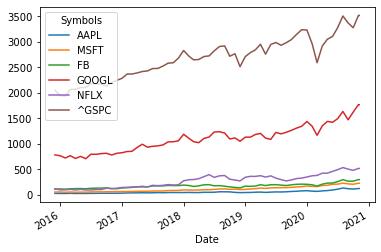

In [4]:
closes.plot()

In [5]:
ret = closes.pct_change().dropna()

<AxesSubplot:xlabel='Date'>

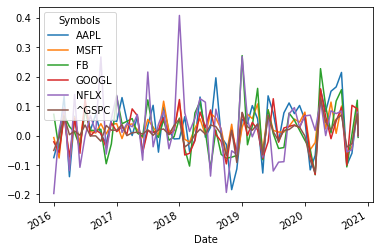

In [6]:
ret.plot()

## 3. Calculando los coeficientes $\beta$ (50 puntos)

Usando los datos de rendimientos mensuales calculados en el punto anterior:

1. Estime el valor del coeficiente de riesgo sistemático $\beta$ para cada uno de los activos seleccionados, con el método visto en clase (5 puntos por cada activo).
2. Compare su estimación de $\beta$ con el valor reportado en Yahoo! Finance mediante el error relativo: 
$$e_{relativo}=\frac{\beta_{estimado}-\beta_{Yahoo!}}{\beta_{Yahoo!}}.$$
Concluya de acuerdo al valor del error relativo obtenido (5 puntos por cada activo).

In [7]:
# Obtener matriz de covarianza
cov = ret.cov()
cov

Symbols,AAPL,MSFT,FB,GOOGL,NFLX,^GSPC
Symbols,,,,,,
AAPL,0.007434,0.003094,0.003970,0.003013,0.003391,0.002401
MSFT,0.003094,0.002867,0.002356,0.002320,0.002903,0.001625
FB,0.003970,0.002356,0.006666,0.003081,0.004476,0.002368
GOOGL,0.003013,0.002320,0.003081,0.003891,0.002572,0.001907
NFLX,0.003391,0.002903,0.004476,0.002572,0.011471,0.001844
^GSPC,0.002401,0.001625,0.002368,0.001907,0.001844,0.001839


In [8]:
# Beta de Microsoft
beta_MSFT = cov.loc['MSFT', '^GSPC']/cov.loc['^GSPC', '^GSPC']
round(beta_MSFT, 2)

0.88

In [9]:
# Beta de Apple
beta_AAPL = cov.loc['AAPL', '^GSPC']/cov.loc['^GSPC', '^GSPC']
round(beta_AAPL, 2)

1.31

In [10]:
# Beta de Facebook
beta_FB = cov.loc['FB', '^GSPC']/cov.loc['^GSPC', '^GSPC']
round(beta_FB, 2)

1.29

In [11]:
# Beta de Google
beta_GOOGL = cov.loc['GOOGL', '^GSPC']/cov.loc['^GSPC', '^GSPC']
round(beta_GOOGL, 2)

1.04

In [12]:
# Beta de Netflix
beta_NFLX = cov.loc['NFLX', '^GSPC']/cov.loc['^GSPC', '^GSPC']
round(beta_NFLX, 2)

1.0

In [16]:
#Betas de yahoo a 5 años mensuales
B_MSFT = 0.87
B_AAPL = 1.35
B_FB = 1.27
B_GOOGL = 1.02
B_NFLX = 1.02

In [17]:
#Errores Relativos
E_MSFT = (beta_MSFT-B_MSFT)/B_MSFT
E_AAPL = (beta_AAPL-B_AAPL)/B_AAPL
E_FB = (beta_FB-B_FB)/B_FB
E_GOOGL = (beta_GOOGL-B_GOOGL)/B_GOOGL
E_NFLX = (beta_NFLX-B_NFLX)/B_NFLX
E_MSFT, E_AAPL, E_FB, E_GOOGL, E_NFLX 

(0.01578234823514794,
 -0.033158308685225575,
 0.013845022932539412,
 0.0167687450029675,
 -0.017232859913390308)

### Podemos concluir en base a los errores relativos, que la estimación en base a los datos históricos de la Beta, es una buena forma para conseguir el parámetro, ya que vemos que el error es pequeño para haber tomado 5 años. Creo que es incluso posible decir que yahoo Finance realiza el cálculo de la beta de esa manera.

## 4. Gráfico y conclusiones (30 puntos)

1. Grafique cada uno de los activos en el espacio de $E[r]$ (eje $y$) vs. $\beta$ (eje $x$) (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. De la ecuación obtenida, identifique el valor de la tasa libre de riesgo $r_f$, y el valor del rendimiento esperado del portafolio de mercado $E[r_M]$. Compare este último con el rendimiento esperado del índice S&P500 (10 puntos).

In [25]:
import matplotlib.pyplot as plt

In [26]:
# Resumen en base anual
annual_ret_summary = pd.DataFrame({'Media': 12 * ret.mean(), 'Beta': [beta_AAPL, beta_MSFT, beta_FB, beta_GOOGL, beta_NFLX, 1]})
annual_ret_summary

,Media,Beta
Symbols,,
AAPL,0.364326,1.305236
MSFT,0.316787,0.883731
FB,0.245208,1.287583
GOOGL,0.187339,1.037104
NFLX,0.367807,1.002422
^GSPC,0.119638,1.000000


Text(0, 0.5, 'Rendimiento esperado $E[r]$')

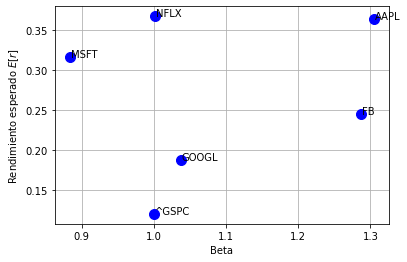

In [35]:
plt.figure(figsize=(6, 4));
for i in range(len(annual_ret_summary)):
    plt.plot(annual_ret_summary.iloc[i, 1], annual_ret_summary.iloc[i, 0], 'ob', ms=10)
    plt.text(annual_ret_summary.iloc[i, 1]+0.001, annual_ret_summary.iloc[i, 0], annual_ret_summary.index[i])
    
plt.grid()
plt.xlabel("Beta")
plt.ylabel("Rendimiento esperado $E[r]$")

In [36]:
# Importar el módulo optimize de la librería scipy
from scipy.optimize import minimize

In [37]:
# Funcion objetivo y condicion inicial
def min_sq(beta, y, x):
    f_hat = beta[0] + beta[1] * x
    sum_sq = ((y - f_hat)**2).sum()
    return sum_sq

x0 = [0, 0]

In [38]:
# Resolver problema de optimizacion
resultado = minimize(fun=min_sq,
                     x0=x0,
                     args=(annual_ret_summary['Media'], annual_ret_summary['Beta'])
                    )

In [39]:
resultado

      fun: 0.049108893783570334
 hess_inv: array([[ 4.11182863, -3.70943632],
       [-3.70943632,  3.41564699]])
      jac: array([ 1.86264515e-09, -4.65661287e-10])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.15544183, 0.10258545])

In [40]:
opt = resultado.x

In [42]:
import numpy as np

Text(0, 0.5, 'Rendimiento esperado $E[r]$')

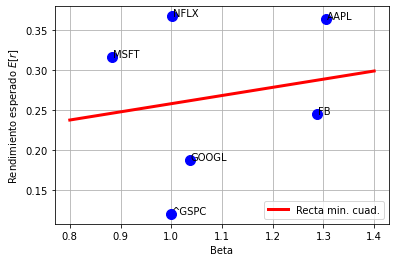

In [46]:
plt.figure(figsize=(6, 4));
for i in range(len(annual_ret_summary)):
    plt.plot(annual_ret_summary.iloc[i, 1], annual_ret_summary.iloc[i, 0], 'ob', ms=10)
    plt.text(annual_ret_summary.iloc[i, 1]+0.001, annual_ret_summary.iloc[i, 0], annual_ret_summary.index[i])
    
x = np.linspace(0.8, 1.40)
plt.plot(x, opt[0] + opt[1] * x, '-r', lw=3, label='Recta min. cuad.')
    
plt.grid()
plt.legend(loc='best')    
plt.xlabel("Beta")
plt.ylabel("Rendimiento esperado $E[r]$")

Ecuación = $0.1554 + .1025*\beta$

In [50]:
Erm = 0.1554 + .1025*1
Erm, annual_ret_summary.loc['^GSPC', 'Media']

(0.2579, 0.11963792585984726)

De acuerdo a la ecuación, la tasa libre de riesgo es de $15.54\%$ y el rendimiento esperado del portafolio de mercado es de $25.79\%$, a diferencia del $11.96\%$ del GSPC

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>